<a href="https://colab.research.google.com/github/jdeversdev/Data-Analytics-WGU/blob/master/D209_JD_TSK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Research Question

**A1.**  Can we predict whether a patient, based on their age, gender, complication risk assessment, high blood pressure status, diabetes status, and overweight status, will experience a medical complication during their hospital stay?"

**A2.**

The goals of the data analysis are to predict the likelihood of a patient experiencing medical complications during their hospital stay. This involves using age, gender, complication risk assessment, high blood pressure status, diabetes status, and overweight status as predictors to provide valuable insights into potential medical risks for patients.



# Part II: Method Justification

**B1.**

The K-nearest neighbors (KNN) algorithm predicts patients' risk of medical complications using age, gender, complication risk, high blood pressure, diabetes, and overweight status. It finds similar patients and assigns risk levels based on majority voting. Expected outcomes include accurate risk predictions and insights for patient
care decisions.

---
**B2.**

Aymane Hachcham's quote from the Neptune.ai website perfectly encapsulates one of the core assumptions of the K-nearest neighbors (KNN) algorithm. He states that "A core assumption of KNN is: The closer two given points are to each other, the more related and similar they are."

This assumption aligns with the principle of local smoothness in KNN, where similar data points are expected to be close to each other in the feature space.


---



**B3.**

- **Pandas (pd):** Used for handling and analyzing data in a structured format.
- **Matplotlib (plt) and Seaborn (sns):** Help visualize data and results with charts and plots.
- **NumPy (np):** Provides support for numerical operations and data manipulation.
- **Statsmodels (sm):** Used for statistical modeling and testing.
- **Scikit-learn (sklearn):**
  - **LabelEncoder:** Converts categorical labels into numerical format.
  - **StandardScaler:** Standardizes features to ensure fair comparison.
  - **train_test_split:** Splits data into training and testing sets.
  - **GridSearchCV:** Finds the best model parameters using cross-validation.
  - **KNeighborsClassifier:** Implements the KNN algorithm for classification.
  - **classification_report, confusion_matrix, accuracy_score, roc_curve, auc:** Evaluate and measure the performance of the model.

# Part III: Data Preparation

**C1.**

One data preprocessing goal relevant to the K-nearest neighbors (KNN) classification method for the research question is feature scaling. This goal involves scaling or normalizing the numerical features, such as age, to ensure that all features contribute equally to the distance calculation and prevent features with larger scales from dominating the algorithm.

**C2.**

1. Age: Numeric
2. Gender: Categorical
3. HighBlood (High blood pressure): Categorical (Yes/No)
4. Diabetes: Categorical (Yes/No)
5. Overweight: Categorical (Yes/No)
6. Complication_risk (Dependent variable): Categorical (High/Medium/Low)

**C3.**

**1. Handling Missing Values & Duplicates:**
   - *Goal:* Ensure completeness in the dataset by addressing missing values and duplicates.
   - *Steps:*
     - Identify missing values.
     - Impute missing values using appropriate techniques.
     - Identify duplicates
     - Proceed to remove duplicates

**2. Outlier Detection and Removal:**
   - *Goal:* Enhance data quality by identifying and addressing outliers.
   - *Steps:*
     - Visualize and detect outliers.
     - Remove or adjust extreme values.

**3. Handling Categorical Variables:**
   - *Goal:* Encode categorical variables for analysis.
   - *Steps:*
     - Identify categorical variables.
     - Use mapping or label encoding to convert them into numerical format.

In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Load the dataset

data_csv = '/content/medical_clean.csv'
data = pd.read_csv(data_csv)

# Display the first few rows of the dataset
data.head()

# Checking the shape of the dataset
data_shape = data.shape
print("Data shape:", data_shape)

# Checking data types of each column
data_types = data.dtypes
print("Data types:", data_types)

# Checking for duplicates
duplicate_count = data.duplicated().sum()
print("Duplicate count:", duplicate_count)

Data shape: (10000, 50)
Data types: CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hype

In [ ]:
# 1. Handling Missing Values
# Identify missing values
missing_values = data[['Age', 'Gender', 'Complication_risk', 'HighBlood', 'Diabetes', 'Overweight']].isnull().sum()
print(missing_values)

Age                  0
Gender               0
Complication_risk    0
HighBlood            0
Diabetes             0
Overweight           0
dtype: int64


<Axes: xlabel='Age'>

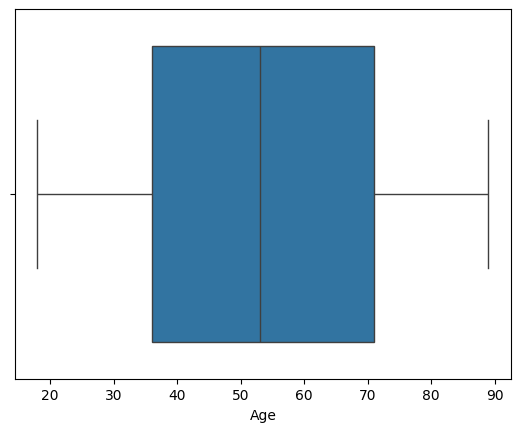

In [ ]:
# 2. Outlier Detection and Removal
# Visualize and detect outliers
# (Use plots such as box plots or scatter plots)
sns.boxplot(x=data['Age'])


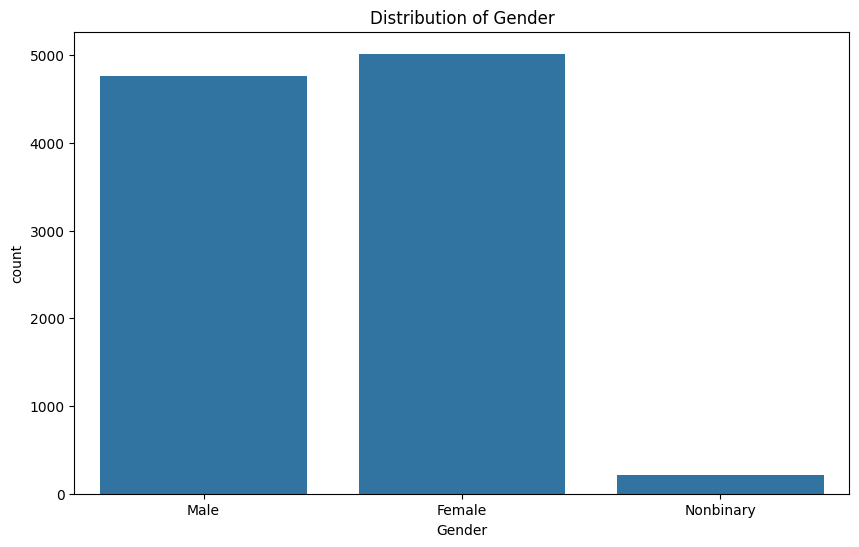

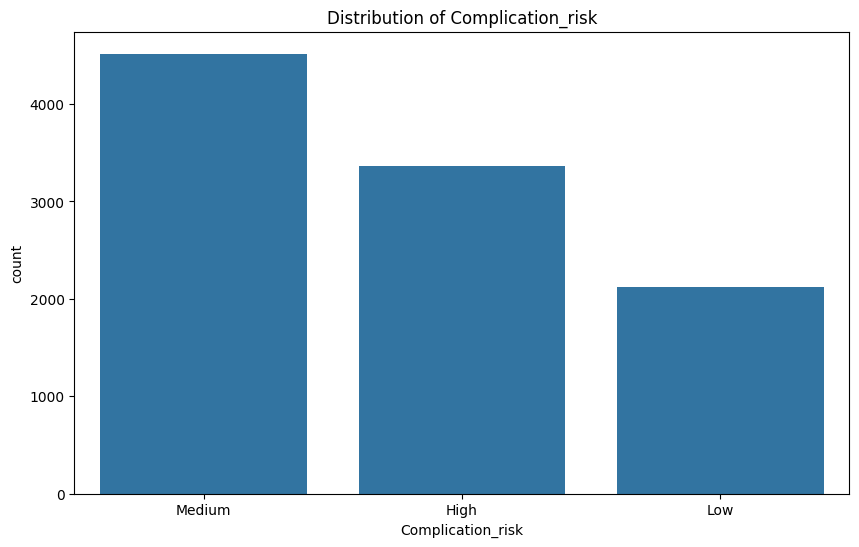

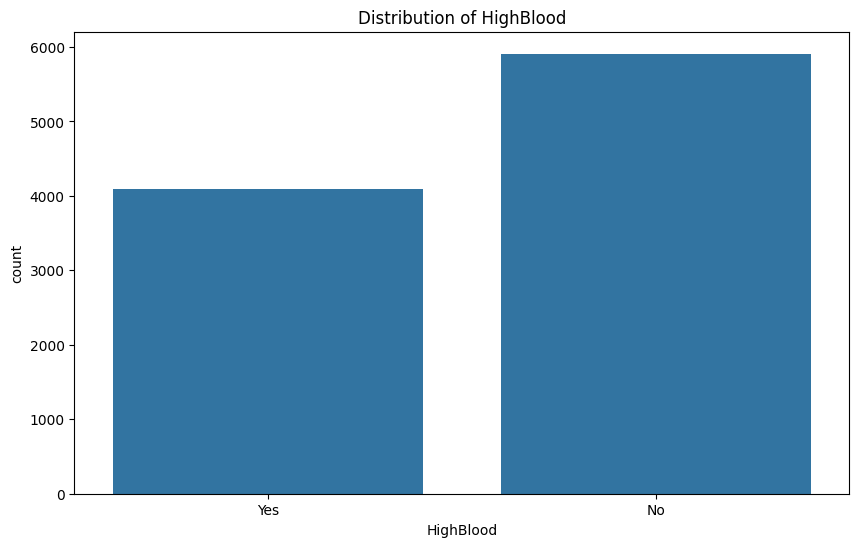

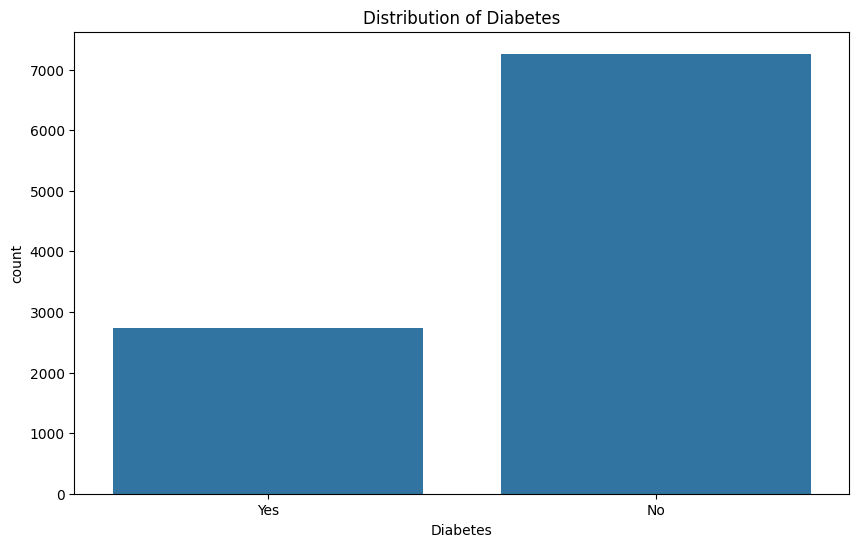

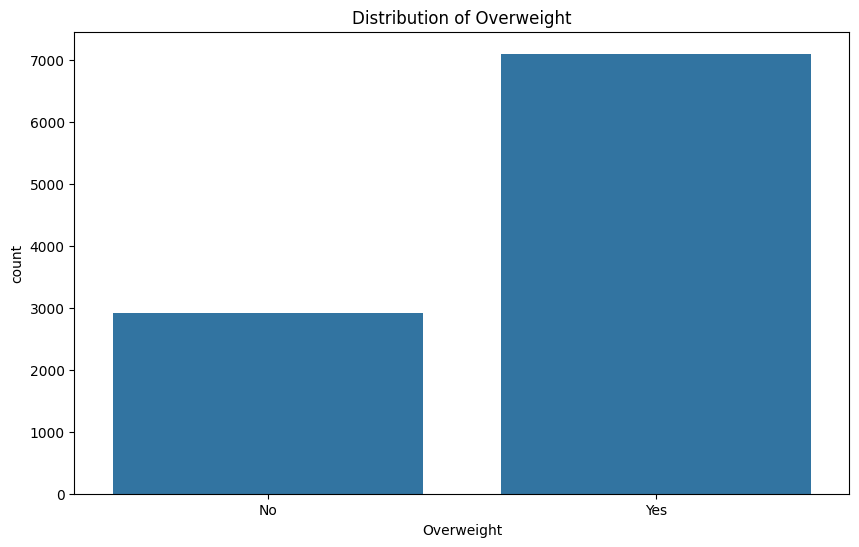

In [ ]:
# Check distribution of categorical variables to identify anomalies

categorical_vars = ['Gender', 'Complication_risk', 'HighBlood', 'Diabetes', 'Overweight']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[var])
    plt.title(f'Distribution of {var}')
    plt.show()


In [ ]:
# We use map labeling instead of one-hot encoding because map labeling is simpler and more suitable for KNN when
# handling categorical variables, whereas one-hot encoding increases dimensionality and may not improve KNN's performance

# Create a copy of the relevant columns to work with
prepared_data = data[['Age', 'Gender', 'Complication_risk', 'HighBlood', 'Diabetes', 'Overweight']].copy()

# Create a LabelEncoder object
le = LabelEncoder()

# Map labeling for 'Gender'
prepared_data['Gender'] = le.fit_transform(prepared_data['Gender'])

# Map labeling for 'Complication_risk'
prepared_data['Complication_risk'] = le.fit_transform(prepared_data['Complication_risk'])

# Map labeling for 'HighBlood'
prepared_data['HighBlood'] = le.fit_transform(prepared_data['HighBlood'])

# Map labeling for 'Diabetes'
prepared_data['Diabetes'] = le.fit_transform(prepared_data['Diabetes'])

# Map labeling for 'Overweight'
prepared_data['Overweight'] = le.fit_transform(prepared_data['Overweight'])

# The 'Age' column remains unchanged because it is not categorical.

# Check the first few rows to see the changes
print(prepared_data.head())


   Age  Gender  Complication_risk  HighBlood  Diabetes  Overweight
0   53       1                  2          1         1           0
1   51       0                  0          1         0           1
2   53       0                  2          1         1           1
3   78       1                  2          0         0           0
4   22       0                  1          0         0           0


# **C4.** CSV

In [ ]:
# Save the prepared data to a CSV file
prepared_data.to_csv('/content/prepared_data.csv', index=False)
print(prepared_data.head())


   Age  Gender  Complication_risk  HighBlood  Diabetes  Overweight
0   53       1                  2          1         1           0
1   51       0                  0          1         0           1
2   53       0                  2          1         1           1
3   78       1                  2          0         0           0
4   22       0                  1          0         0           0


# Part IV: Analysis

# **D1.**

In [ ]:
# KNN

# Setting up prepared_data
X = prepared_data.drop('Complication_risk', axis=1)  # Features
y = prepared_data['Complication_risk']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Save X_train and X_test to CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Save y_train and y_test to CSV
y_train.to_csv('y_train.csv', index=False, header=['Complication_risk'])
y_test.to_csv('y_test.csv', index=False, header=['Complication_risk'])

# **D2.**
---

To analyze the data, I used the K-Nearest Neighbors (KNN) algorithm with some extra steps to make sure I got the best results.

1. **Data Preparation:**
   - I started with my dataset, which had columns like Age, Gender, HighBlood, Diabetes, and Overweight. The target variable was Complication_risk.
   - I split the data into training and testing sets to have 80% for training the model and 20% for testing it.

2. **Data Scaling:**
   - I used a method called StandardScaler to standardize the features. This means I scaled the data so that each feature has a mean of 0 and a standard deviation of 1. This step helps improve the performance of the KNN algorithm.

3. **Model Initialization:**
   - I set up the KNN classifier, which looks at the closest data points (neighbors) to make a prediction.

4. **Hyperparameter Tuning:**
   - To find the best number of neighbors (n_neighbors), I used GridSearchCV. This is a method that tries different values of n_neighbors (from 150 to 170) and finds the best one based on accuracy.
   - GridSearchCV also performed cross-validation (split the data into parts, trained the model on some parts, and tested it on the rest) to make sure the model performs well on different subsets of the data.

5. **Training and Testing:**
   - After running GridSearchCV, I got the best model (best_knn) with the optimal number of neighbors.
   - I used this model to make predictions on the test set and calculated the accuracy.

6. **Model Evaluation:**
   - I evaluated the model using a confusion matrix, which shows how many instances were correctly or incorrectly classified for each class (Low, Medium, High risk).
   - I also used a classification report to get precision, recall, and F1-score for each class. These metrics help understand the model's performance in more detail.

---
---

### **Intermediate Calculations:**

1. **Data Splitting:**
   - Split the dataset into training (80%) and testing (20%) sets.

2. **Data Scaling:**
   - Standardize the features using `StandardScaler`.

3. **Hyperparameter Tuning with GridSearchCV:**
   - Perform grid search to find the best number of neighbors (`n_neighbors`) for the KNN classifier, testing values from 150 to 170.
   - Use 5-fold cross-validation within the grid search to evaluate each value of `n_neighbors`.

4. **Model Selection:**
   - Select the best model based on cross-validation accuracy.

5. **Predictions:**
   - Use the best model to predict probabilities and final class labels on the test set.

6. **Model Evaluation:**
   - Calculate accuracy, confusion matrix, and classification report (precision, recall, F1-score).

In [ ]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define the range of values for n_neighbors
k_range = list(range(150, 170))

# Define parameter grid
param_grid = dict(n_neighbors=k_range)

# Setup GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Predictions on the test set using the best model found
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])

# Print confusion matrix with class names
print("\nConfusion Matrix:")
print("              Predicted Class for Complication Risk")
print("    Low      ", conf_matrix[0])
print("    Medium   ", conf_matrix[1])
print("    High     ", conf_matrix[2])

# Print classification report
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 151}
Best Accuracy: 0.446875
Accuracy for our testing dataset with tuning is : 45.75%

Confusion Matrix:
              Predicted Class for Complication Risk
    Low       [ 58   0 589]
    Medium    [ 43   0 386]
    High      [ 67   0 857]

Classification Report:
              precision    recall  f1-score   support

         Low       0.35      0.09      0.14       647
      Medium       0.00      0.00      0.00       429
        High       0.47      0.93      0.62       924

    accuracy                           0.46      2000
   macro avg       0.27      0.34      0.25      2000
weighted avg       0.33      0.46      0.33      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The reason why Medium has a score of 0 is that Medium instances were predicted as Low or High**

# **D3.** A Python file has been attached to the submission.

# Part V: Data Summary and Implications

# **E1.**

The KNN model achieved an accuracy of 45.75% on the test data, meaning it correctly predicted the complication risk for about 46 out of every 100 patients. To further evaluate the model, the ROC curve was used to measure the Area Under the Curve (AUC) for each risk category—Low, Medium, and High. The AUC scores were 0.50 for Low risk, 0.51 for Medium risk, and 0.51 for High risk. These scores indicate that the model's ability to distinguish between different complication risks is only slightly better than random guessing. Overall, while the model provides some predictive power, there is significant room for improvement in its performance.

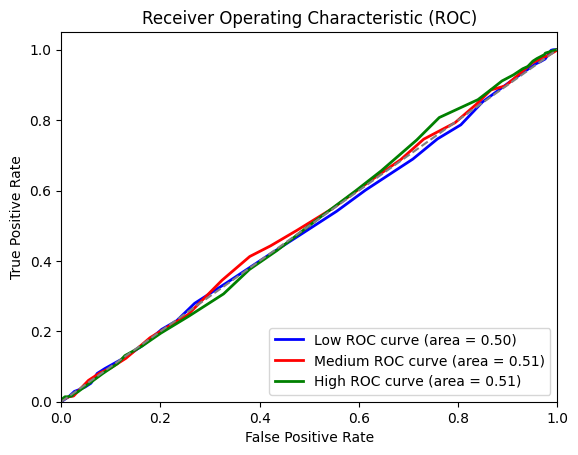

Class 'Low' ROC AUC: 0.50
Class 'Medium' ROC AUC: 0.51
Class 'High' ROC AUC: 0.51


In [ ]:
# Assuming class names corresponding to indices 0, 1, 2
class_names = ['Low', 'Medium', 'High']

# Predict probabilities for the test set using the best_knn model
y_pred_prob = best_knn.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC scores for each class
for i in range(3):  # Assuming 3 classes
    print(f"Class '{class_names[i]}' ROC AUC: {roc_auc[i]:.2f}")

# **E2.**

The KNN model was used to predict if a patient would have a medical complication during their hospital stay based on factors like age, gender, high blood pressure, diabetes, and being overweight. The model's accuracy was 45.75%, meaning it got the prediction right about 46 times out of 100. It did best at predicting 'High' complication risk but had trouble with 'Low' and 'Medium' risks. For 'High' risk, the model's precision was 0.47, recall was 0.93, and f1-score was 0.62, but it didn't do well for 'Low' (precision 0.35, recall 0.09, f1-score 0.14) and 'Medium' (precision, recall, and f1-score were all 0.00) which may be because the it was underrepresented in the dataset or it overlaps with other classes. That could explain why they were all 0.00 based on final predictions.

In summary, the model's performance is disappointing, with an overall accuracy of about 46%. It struggles most with the medium-risk class, which is never correctly predicted, while it somewhat better identifies high-risk cases but still has issues with precision. The low-risk cases are often misclassified as high-risk. This suggests problems with how the model distinguishes between classes and possible issues with class imbalance or feature selection.

# **E3.**

One limitation of this data analysis is the model's poor performance in predicting 'Low' and 'Medium' complication risks. The low precision, recall, and f1-scores for these classes indicate that the current features and model don't capture the necessary details to differentiate these risk categories accurately. Improving the model might require additional data or more relevant features.

# **E4.**

The analysis shows that the model needs better data to improve its accuracy. It’s important to gather more detailed patient information, especially for those at 'Medium' and 'Low' risk. Meanwhile, keep a close watch on 'High' risk patients, as the model is more reliable for this group. Also, training staff to spot early signs of complications could enhance patient care and outcomes.

# **G.**

[KNN Classifier in Sklearn using GridSearchCV with Example](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/)

[roc_curve compute the ROC curve, and the AUC (Area Under the Curve) can be derived from this curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

# **H.**

[The KNN Algorithm Assumption – Explanation, Opportunities, Limitations](https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations)
